In [1]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=2

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=2


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
import umap
import pandas as pd

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from avgn.signalprocessing.create_spectrogram_dataset import flatten_spectrograms
from avgn.visualization.spectrogram import draw_spec_set
from avgn.visualization.quickplots import draw_projection_plots

In [5]:
from avgn.visualization.projections import (
    scatter_projections,
    draw_projection_transitions,
)

### Collect data

In [6]:
DATASET_ID = 'bengalese_finch_sober'

### create dataset

In [7]:
from avgn.utils.hparams import HParams
from avgn.dataset import DataSet

In [8]:
hparams = HParams(
    num_mel_bins = 32,
    mel_lower_edge_hertz=500,
    mel_upper_edge_hertz=15000,
    butter_lowcut = 500,
    butter_highcut = 15000,
    ref_level_db = 20,
    min_level_db = -25,
    mask_spec = True,
    win_length_ms = 10,
    hop_length_ms = 2,
    nex=-1,
    n_jobs=-1,
    verbosity = 1,
)

In [9]:
# create a dataset object
dataset = DataSet(DATASET_ID, hparams = hparams)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.6s


[Parallel(n_jobs=-1)]: Done 2663 out of 2663 | elapsed:    5.4s finished


### load syllable df

In [10]:
df_loc =  DATA_DIR / 'syllable_dfs' / DATASET_ID / 'bf.pickle'
df_loc

PosixPath('/local/home/tsainbur/github_repos/avgn_paper/data/syllable_dfs/bengalese_finch_sober/bf.pickle')

In [11]:
syllable_df = pd.read_pickle(df_loc)

In [12]:
syllable_df[:3]

,start_time,end_time,labels,indv,indvi,key,rate,spectrogram
0,1.058250,1.089219,i,gr41rd51,0,gr41rd51__3part_SYLc_th4191_belowhits_220612_1...,32000,"[[5, 5, 5, 5, 3, 25, 26, 75, 105, 80, 47, 16, ..."
1,2.058187,2.117165,i,gr41rd51,0,gr41rd51__3part_SYLc_th4191_belowhits_220612_1...,32000,"[[4, 4, 4, 4, 16, 8, 6, 11, 7, 3, 3, 14, 51, 2..."
2,2.234500,2.285938,i,gr41rd51,0,gr41rd51__3part_SYLc_th4191_belowhits_220612_1...,32000,"[[2, 2, 2, 3, 0, 26, 49, 12, 9, 2, 2, 93, 68, ..."


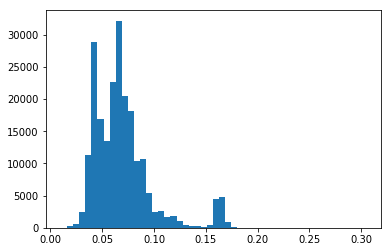

In [54]:
plt.hist(np.array(syllable_df.end_time - syllable_df.start_time), bins=50);

### Cluster

In [13]:
def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

In [14]:
from cuml.manifold.umap import UMAP as cumlUMAP
import hdbscan

In [15]:
from avgn.umap import umap_reduce

gr41rd51 52788


Exception ignored in: <bound method UMAP.__del__ of UMAP()>
Traceback (most recent call last):
  File "cuml/manifold/umap.pyx", line 313, in cuml.manifold.umap.UMAP.__del__
AttributeError: 'UMAP' object has no attribute 'umap_params'
/local/home/tsainbur/github_repos/avgn_paper/avgn/umap.py:11: UserWarning: Exception occured! file=/conda/conda-bld/libcuml_1566588242169/work/cpp/src/common/cumlHandle.cpp line=177: FAIL: call='cudaGetDevice(&cur_dev)'. Reason:no CUDA-capable device is detected

Obtained 64 stack frames
#0 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9Exception16collectCallStackEv+0x3e) [0x7f8b1806556e]
#1 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9ExceptionC2ERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE+0x80) [0x7f8b18066080]
#2 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../lib

or60yw70 35799


Exception ignored in: <bound method UMAP.__del__ of UMAP()>
Traceback (most recent call last):
  File "cuml/manifold/umap.pyx", line 313, in cuml.manifold.umap.UMAP.__del__
AttributeError: 'UMAP' object has no attribute 'umap_params'
/local/home/tsainbur/github_repos/avgn_paper/avgn/umap.py:11: UserWarning: Exception occured! file=/conda/conda-bld/libcuml_1566588242169/work/cpp/src/common/cumlHandle.cpp line=177: FAIL: call='cudaGetDevice(&cur_dev)'. Reason:no CUDA-capable device is detected

Obtained 64 stack frames
#0 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9Exception16collectCallStackEv+0x3e) [0x7f8b1806556e]
#1 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9ExceptionC2ERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE+0x80) [0x7f8b18066080]
#2 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../lib

gy6or6 56375


Exception ignored in: <bound method UMAP.__del__ of UMAP()>
Traceback (most recent call last):
  File "cuml/manifold/umap.pyx", line 313, in cuml.manifold.umap.UMAP.__del__
AttributeError: 'UMAP' object has no attribute 'umap_params'
/local/home/tsainbur/github_repos/avgn_paper/avgn/umap.py:11: UserWarning: Exception occured! file=/conda/conda-bld/libcuml_1566588242169/work/cpp/src/common/cumlHandle.cpp line=177: FAIL: call='cudaGetDevice(&cur_dev)'. Reason:no CUDA-capable device is detected

Obtained 64 stack frames
#0 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9Exception16collectCallStackEv+0x3e) [0x7f8b1806556e]
#1 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9ExceptionC2ERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE+0x80) [0x7f8b18066080]
#2 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../lib

bl26lb16 70701


Exception ignored in: <bound method UMAP.__del__ of UMAP()>
Traceback (most recent call last):
  File "cuml/manifold/umap.pyx", line 313, in cuml.manifold.umap.UMAP.__del__
AttributeError: 'UMAP' object has no attribute 'umap_params'
/local/home/tsainbur/github_repos/avgn_paper/avgn/umap.py:11: UserWarning: Exception occured! file=/conda/conda-bld/libcuml_1566588242169/work/cpp/src/common/cumlHandle.cpp line=177: FAIL: call='cudaGetDevice(&cur_dev)'. Reason:no CUDA-capable device is detected

Obtained 64 stack frames
#0 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9Exception16collectCallStackEv+0x3e) [0x7f8b1806556e]
#1 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9ExceptionC2ERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE+0x80) [0x7f8b18066080]
#2 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../lib

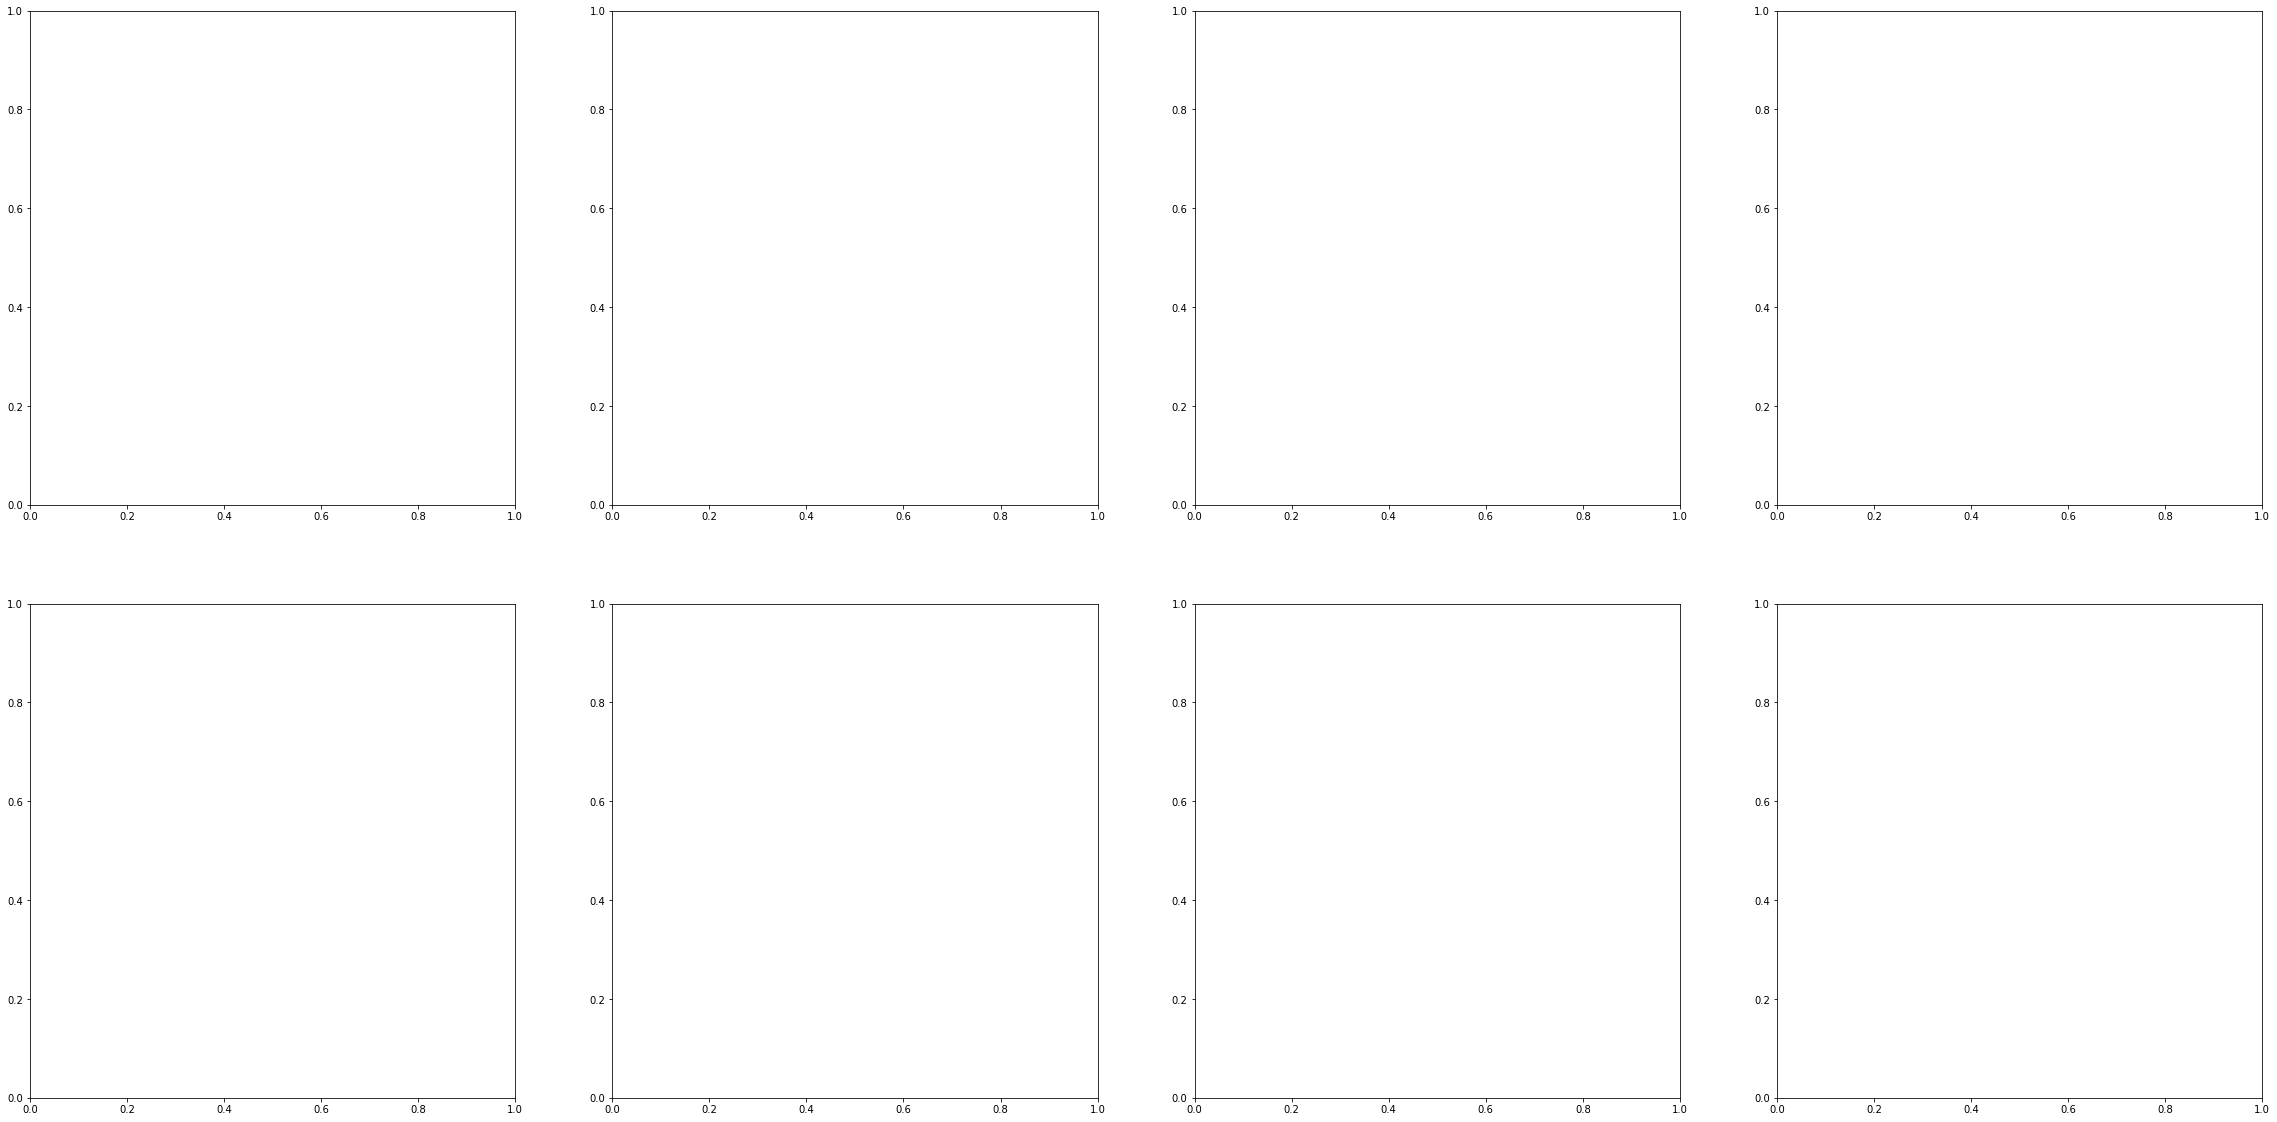

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=len(syllable_df.indv.unique()), figsize=(10*len(syllable_df.indv.unique()), 20))

indv_dfs = {}
for indvi, indv in enumerate(tqdm(syllable_df.indv.unique())):
    #if indv != 'Bird5': continue
    indv_dfs[indv] = syllable_df[syllable_df.indv == indv]
    indv_dfs[indv] = indv_dfs[indv].sort_values(by=["key", "start_time"])
    print(indv, len(indv_dfs[indv]))
    specs = [norm(i) for i in indv_dfs[indv].spectrogram.values]
    
    # sequencing
    indv_dfs[indv]["syllables_sequence_id"] = None
    indv_dfs[indv]["syllables_sequence_pos"] = None
    for ki, key in enumerate(indv_dfs[indv].key.unique()):
        indv_dfs[indv].loc[indv_dfs[indv].key == key, "syllables_sequence_id"] = ki
        indv_dfs[indv].loc[indv_dfs[indv].key == key, "syllables_sequence_pos"] = np.arange(
            np.sum(indv_dfs[indv].key == key)
        )
        
    # umap
    specs_flattened = flatten_spectrograms(specs)
    #cuml_umap = cumlUMAP(min_dist=0.5)
    #z = list(cuml_umap.fit_transform(specs_flattened))
    z, _ = umap_reduce(specs_flattened, min_dist = 0.5)
    indv_dfs[indv]["umap"] = list(z)
    
    # HDBSCAN UMAP
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=int(len(z) * 0.01), # the smallest size we would expect a cluster to be
        min_samples=1, # larger values = more conservative clustering
    )
    clusterer.fit(z);
    indv_dfs[indv]['hdbscan_labels'] = clusterer.labels_

    

In [361]:
save_loc = DATA_DIR / 'indv_dfs' / DATASET_ID
ensure_dir(save_loc)

In [363]:
for indv in tqdm(indv_dfs.keys()):
    indv_dfs[indv].to_pickle(save_loc / (indv + '.pickle'))

### Plot spectrogram with labels

In [195]:
import seaborn as sns
def song_barcode(start_times, stop_times, labels, label_pal_dict, resolution = 0.01):
    """
    """
    begin = np.min(start_times)
    end = np.max(stop_times)
    trans_list = np.zeros(
        int((end - begin) / resolution)
    ).astype('uint8').astype("object")
    #print(end, begin, end-begin, resolution, len(trans_list))
    for start, stop, label in zip(start_times, stop_times, labels):
        trans_list[int((start - begin)/resolution):int((stop-begin)/resolution)] = label
        
    color_list = [label_pal_dict[i] if i in label_pal_dict else [1,1,1] for i in trans_list]
    color_list = np.expand_dims(color_list, 1)
    
    return trans_list, color_list

In [347]:
def indv_barcode(indv_df, time_resolution = 0.02, label = 'labels', pal = "tab20"):
    unique_labels = indv_df[label].unique()
    # song palette
    label_pal = np.random.permutation(sns.color_palette(pal, len(unique_labels)))
    label_pal_dict = {
        lab: color
        for lab, color in zip(
            unique_labels,
            label_pal,
        )
    }
    sns.palplot(list(label_pal_dict.values()))
    label_dict = {lab:int(i) for i, lab in enumerate(unique_labels)}
    
    # get list of syllables by time
    trans_lists = []
    color_lists = []
    for key in tqdm(indv_dfs[indv].key.unique()):
        # dataframe of wavs
        wav_df = indv_dfs[indv][indv_dfs[indv]['key'] == key]
        labels = wav_df['labels'].values
        start_times = wav_df.start_time.values
        stop_times = wav_df.end_time.values
        start_times[:3], stop_times[:3], labels[:3]
        trans_list, color_list = song_barcode(start_times, stop_times, labels, label_pal_dict, resolution = resolution)
        color_lists.append(color_list)
        trans_lists.append(trans_list)

    return color_lists, trans_lists, label_pal_dict, label_pal

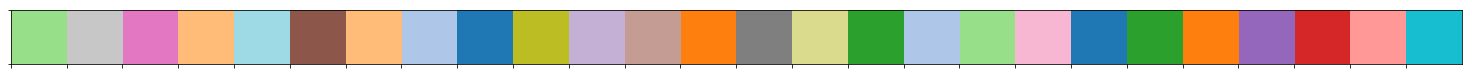

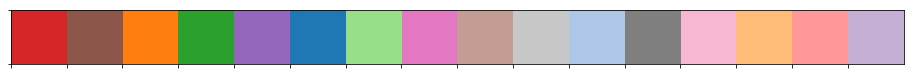

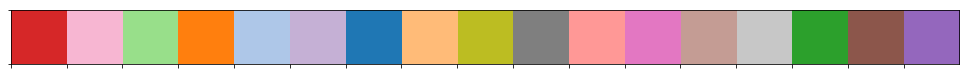

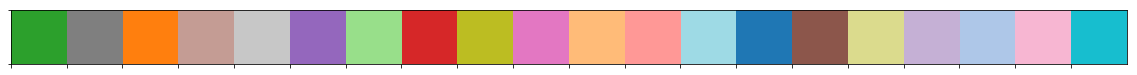

In [364]:
# for each individual in the dataset
for indv in tqdm(indv_dfs.keys()):
    color_lists, trans_lists, label_pal_dict, label_pal = indv_barcode(
        indv_dfs[indv], time_resolution=0.02, label="labels", pal="tab20"
    )
    #break

In [365]:
from scipy.cluster import hierarchy
from nltk.metrics.distance import edit_distance
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

In [366]:
from matplotlib import gridspec

In [367]:
max_list_len = 600 # maximum length to visualize
seq_len = 100 # maximumim length to compute lev distance
nex = 50 # only show up to NEX examples

In [368]:
# subset dataset
color_lists = color_lists[:nex]
trans_lists = trans_lists[:nex]

# get length of lists
list_lens = [len(i) for i in trans_lists]

# set max list length
if max_list_len is None:
    max_list_len = np.max(list_lens)

# make a matrix for color representations of syllables
color_item = np.ones((max_list_len, len(list_lens), 3))
for li, _list in enumerate(tqdm(color_lists)):
    color_item[:len(_list), li, :] = np.squeeze(_list[:max_list_len])
color_items = color_item.swapaxes(0,1)

# make a list of symbols padded to equal length
trans_lists = np.array(trans_lists)
cut_lists = [
    list(i[:seq_len].astype("str"))
    if len(i) >= seq_len
    else list(i) + list(np.zeros(seq_len - len(i)).astype("str"))
    for i in trans_lists
]
cut_lists = [''.join(np.array(i).astype('str')) for i in cut_lists]


# create a distance matrix (THIS COULD BE PARALLELIZED)
dist = np.zeros((len(cut_lists), len(cut_lists)))
for i in tqdm(range(1, len(cut_lists))):
    for j in range(0, i):
        dist[i,j] = edit_distance(cut_lists[i], cut_lists[j])
        dist[j,i] = edit_distance(cut_lists[i], cut_lists[j])
        
# hierarchical clustering
dists = squareform(dist)
linkage_matrix = linkage(dists, "single")

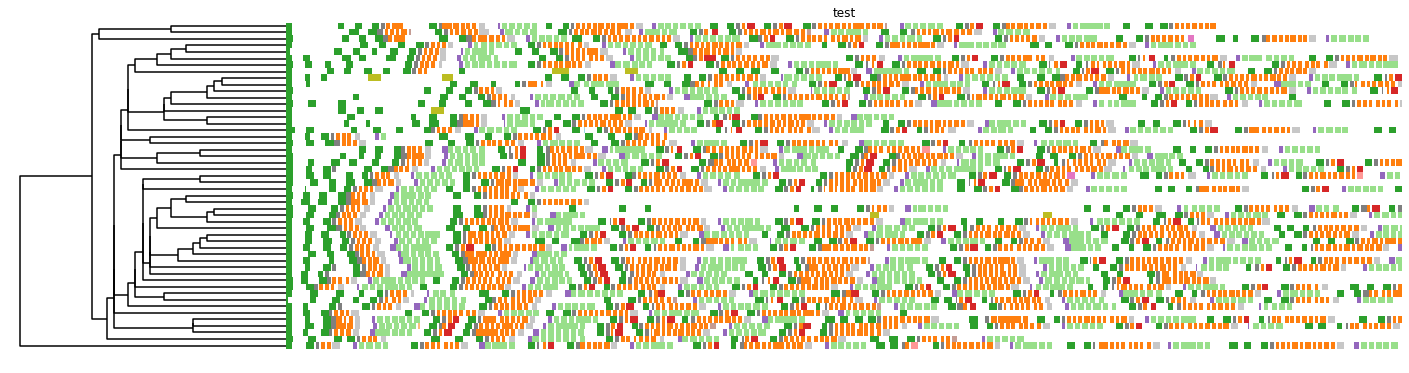

In [369]:
fig = plt.figure(figsize=(25, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 4], wspace=0, hspace=0) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

dn = dendrogram(
    linkage_matrix,
    p=6,
    truncate_mode="none",
    get_leaves=True,
    orientation="left",
    no_labels=True,
    link_color_func=lambda k: "k",
    ax=ax0,
    show_contracted=False
)
plt.title("test")
ax0.axis("off")

ax1.imshow(
    color_item.swapaxes(0, 1)[np.array(dn["leaves"])],
    aspect="auto", 
    interpolation=None,
    origin='lower'
)
ax1.axis("off")

plt.show()